In [ ]:
#this code generates random graph with n nodes and 
#each node has p probability of being connected to every other node

import random
import networkx as nx

def generate_random_graph(n, p):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for u in range(n-1):
        for v in range(u+1, n):
            if random.uniform(0, 1) <= p:
                G.add_edge(u, v)
    return G

In [ ]:
def bron_kerbosch(graph):
    def visit(p, x):
        # Non-local variables
        nonlocal max_clique, maximal_cliques, graph

        # If both p and x are empty, we have found a maximal clique
        if not p and not x:
            if len(max_clique) < len(r):
                max_clique = r.copy()
            maximal_cliques.append(r.copy())

        # Choose a pivot vertex u from the union of p and x
        pivot = max(p.union(x), key=lambda v: len(graph[v])) if p.union(x) else None

        # For each vertex v in p \ N(u), where N(u) is the neighbors of u
        for v in p - set(graph[pivot]) if pivot is not None else p:
            # Add v to r
            r.add(v)
            # Recurse on the set of vertices in p that are neighbors of v
            visit(p.intersection(set(graph[v])), x.intersection(set(graph[v])))
            # Remove v from r
            r.remove(v)
            # Move v from p to x
            p.remove(v)
            x.add(v)

    # Initialize variables
    max_clique = set()
    maximal_cliques = []
    r = set()
    p = set(graph.nodes())
    x = set()

    # Start the recursion
    visit(p, x)

    # Return the largest maximal clique
    return max_clique



In [ ]:
for i in range(10,20):
  G = generate_random_graph(i, 0.5)
  
  clique = bron_kerbosch(G)
  k = len(clique)
  if clique is not None:
      print(f"Found a {k}-clique for the graph with total nodes {i}: {clique}")
  else:
      print(f"No {k}-clique found.")

Found a 4-clique for the graph with total nodes 10: {0, 9, 2, 7}
Found a 4-clique for the graph with total nodes 11: {1, 4, 5, 9}
Found a 5-clique for the graph with total nodes 12: {0, 5, 6, 8, 10}
Found a 4-clique for the graph with total nodes 13: {8, 1, 3, 4}
Found a 5-clique for the graph with total nodes 14: {0, 1, 3, 6, 7}
Found a 5-clique for the graph with total nodes 15: {0, 2, 9, 10, 12}
Found a 4-clique for the graph with total nodes 16: {0, 1, 5, 8}
Found a 6-clique for the graph with total nodes 17: {16, 1, 3, 4, 13, 15}
Found a 5-clique for the graph with total nodes 18: {1, 2, 3, 17, 10}
Found a 5-clique for the graph with total nodes 19: {0, 17, 3, 10, 13}


In [ ]:
#checking if the runtime is increasing exponentially

import time
times = [10, 30, 50, 70, 90]
for i in times:
  start_time = time.time()
  G = generate_random_graph(i, 0.5)
  
  clique = bron_kerbosch(G)
  k = len(clique)
  if clique is not None:
      print(f"Found a {k}-clique for the graph with total nodes {i}: {clique}")
  else:
      print(f"No {k}-clique found.")
  end_time = time.time()
  elapsed_time = end_time - start_time
  print(f"Times taken for graph with {i} nodes is: {elapsed_time}")
  print("-----------")

Found a 4-clique for the graph with total nodes 10: {0, 8, 3, 5}
Times taken for graph with 10 nodes is: 0.001995563507080078
-----------
Found a 6-clique for the graph with total nodes 30: {2, 18, 22, 7, 8, 9}
Times taken for graph with 30 nodes is: 0.008227825164794922
-----------
Found a 8-clique for the graph with total nodes 50: {36, 37, 6, 40, 41, 43, 13, 17}
Times taken for graph with 50 nodes is: 0.02730584144592285
-----------
Found a 8-clique for the graph with total nodes 70: {1, 4, 12, 15, 50, 52, 27, 29}
Times taken for graph with 70 nodes is: 0.13731813430786133
-----------
Found a 9-clique for the graph with total nodes 90: {64, 33, 70, 38, 28, 17, 54, 60, 29}
Times taken for graph with 90 nodes is: 0.39960432052612305
-----------


Graph size: 10
Bron-Kerbosch Heuristic result: {0, 1, 3, 5, 7}, Time: 0.0003s
Bron-Kerbosch Brute force result  : {0, 1, 3, 5, 7}, Time: 0.0004s
--------------------
Graph size: 20
Bron-Kerbosch Heuristic result: {0, 16, 4, 6, 11}, Time: 0.0011s
Bron-Kerbosch Brute force result  : {0, 4, 6, 11, 16}, Time: 0.0004s
--------------------
Graph size: 30
Bron-Kerbosch Heuristic result: {1, 18, 19, 4, 8, 12, 29}, Time: 0.0043s
Bron-Kerbosch Brute force result  : {1, 4, 8, 12, 18, 19, 29}, Time: 0.0014s
--------------------
Graph size: 40
Bron-Kerbosch Heuristic result: {17, 20, 22, 9, 10, 11, 13}, Time: 0.0124s
Bron-Kerbosch Brute force result  : {9, 10, 11, 13, 17, 20, 22}, Time: 0.0030s
--------------------
Graph size: 50
Bron-Kerbosch Heuristic result: {33, 2, 34, 4, 36, 6, 12, 13}, Time: 0.0369s
Bron-Kerbosch Brute force result  : {33, 2, 34, 4, 36, 6, 12, 13}, Time: 0.0083s
--------------------
Graph size: 60
Bron-Kerbosch Heuristic result: {32, 5, 41, 14, 49, 24, 28, 31}, Time: 0.0609s


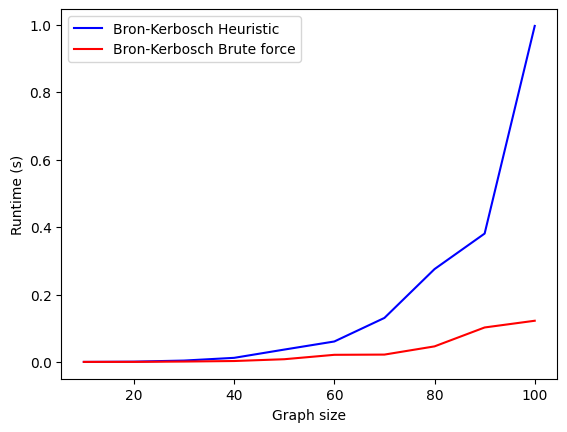

In [ ]:
#adding extra print statements to check which one gave the optimal solution

import random
import networkx as nx
import time
import matplotlib.pyplot as plt


def bron_kerbosch_brute_force(graph):
    """
    Find the largest maximal clique in a graph using brute force.
    """
    max_clique = set()
    for nodes in nx.find_cliques(graph):
        if len(nodes) > len(max_clique):
            max_clique = set(nodes)
    return max_clique
    
bron_kerbosch_times = []
bron_kerbosch_brute_force_times = []

# Compare the runtimes of the two algorithms for different graph sizes
graph_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for n in graph_sizes:
    graph = generate_random_graph(n, 0.5)
    
    # Bron-Kerbosch algorithm
    start_time = time.time()
    bron_kerbosch_result = bron_kerbosch(graph)
    end_time = time.time()
    bron_kerbosch_time = end_time - start_time
    bron_kerbosch_times.append(bron_kerbosch_time)

    # Brute force algorithm
    start_time = time.time()
    brute_force_result = bron_kerbosch_brute_force(graph)
    end_time = time.time()
    brute_force_time = end_time - start_time
    bron_kerbosch_brute_force_times.append(brute_force_time)
    
    # Print results and runtimes
    print(f"Graph size: {n}")
    print(f"Bron-Kerbosch Heuristic result: {bron_kerbosch_result}, Time: {bron_kerbosch_time:.4f}s")
    print(f"Bron-Kerbosch Brute force result  : {brute_force_result}, Time: {brute_force_time:.4f}s")
    print("--------------------")
    

# Plot
plt.plot(graph_sizes, bron_kerbosch_times, label='Bron-Kerbosch Heuristic', color='blue')
plt.plot(graph_sizes, bron_kerbosch_brute_force_times, label='Bron-Kerbosch Brute force', color='red')
plt.xlabel('Graph size')
plt.ylabel('Runtime (s)')
plt.legend()
plt.show()


Success Rate Calculations Conducted for the Graphs with Different Sizes:

Graph size: 10
Bron-Kerbosch Heuristic result: {9, 3, 5, 7}, Time: 0.0003s
Bron-Kerbosch Brute Force result  : {9, 3, 5, 7}, Time: 0.0001s
Success rate of Heuristic Approach: 100.00%
--------------------
Graph size: 20
Bron-Kerbosch Heuristic result: {16, 1, 17, 18, 8, 9}, Time: 0.0010s
Bron-Kerbosch Brute Force result  : {1, 8, 9, 16, 17, 18}, Time: 0.0004s
Success rate of Heuristic Approach: 0.00%
--------------------
Graph size: 30
Bron-Kerbosch Heuristic result: {2, 23, 9, 26, 11}, Time: 0.0023s
Bron-Kerbosch Brute Force result  : {2, 9, 11, 23, 26}, Time: 0.0009s
Success rate of Heuristic Approach: 20.00%
--------------------
Graph size: 40
Bron-Kerbosch Heuristic result: {0, 37, 9, 10, 13, 25}, Time: 0.0108s
Bron-Kerbosch Brute Force result  : {0, 37, 9, 10, 13, 25}, Time: 0.0023s
Success rate of Heuristic Approach: 100.00%
--------------------
Graph size: 50
Bron-Kerbosch Heuristic result: {32, 35, 37, 6, 44, 13, 47}, Time: 0.0187s
Bron-Kerbosch Brute Force result  : {32, 35, 37

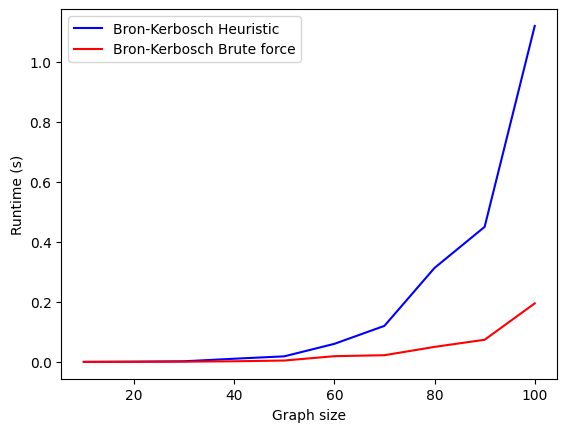

In [ ]:
import random
import networkx as nx
import time
import matplotlib.pyplot as plt


def generate_random_graph(n, p):
    """
    Generate a random graph with n nodes and edge probability p.
    """
    graph = nx.fast_gnp_random_graph(n, p)
    return graph

def bron_kerbosch_brute_force(graph):
    """
    Find the largest maximal clique in a graph using brute force.
    """
    max_clique = set()
    for nodes in nx.find_cliques(graph):
        if len(nodes) > len(max_clique):
            max_clique = set(nodes)
    return max_clique

def calculate_success_rate(result1, result2):
    """
    Calculate the success rate of the heuristic approach compared to the brute force approach for a single calculation.
    """
    success_count = sum(1 for res1, res2 in zip(result1, result2) if res1 == res2)
    success_rate = (success_count / len(result1)) * 100
    return success_rate


bron_kerbosch_times = []
bron_kerbosch_brute_force_times = []
success_rates = []
total_success = 0
counter = 0
# Compare the results and runtimes of the two algorithms for different graph sizes
graph_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for n in graph_sizes:
    graph = generate_random_graph(n, 0.5)
    
    # Bron-Kerbosch algorithm
    start_time = time.time()
    bron_kerbosch_result = bron_kerbosch(graph)
    end_time = time.time()
    bron_kerbosch_time = end_time - start_time
    bron_kerbosch_times.append(bron_kerbosch_time)

    # Brute force algorithm
    start_time = time.time()
    brute_force_result = bron_kerbosch_brute_force(graph)
    end_time = time.time()
    brute_force_time = end_time - start_time
    bron_kerbosch_brute_force_times.append(brute_force_time)
    
    # Calculate success rate for the current calculation
    success_rate = calculate_success_rate(bron_kerbosch_result, brute_force_result)
    success_rates.append(success_rate)
    #print("success rate added: ", success_rate)
    total_success += success_rate
    #print("total success ", total_success)
    counter = counter +1 
    #print("counter ", counter)
    #print("success rate appended", success_rate)
    
    # Print results and runtimes
    print(f"Graph size: {n}")
    print(f"Bron-Kerbosch Heuristic result: {bron_kerbosch_result}, Time: {bron_kerbosch_time:.4f}s")
    print(f"Bron-Kerbosch Brute Force result  : {brute_force_result}, Time: {brute_force_time:.4f}s")
    print(f"Success rate of Heuristic Approach: {success_rate:.2f}%")
    print("--------------------")


    #success_rate = calculate_success_rate(list(bron_kerbosch_result), list(brute_force_result))
    #success_rates.append(success_rate)



# Calculate success rates for different graph sizes
#success_rates = []
#for n in graph_sizes:
    # ...
    #success_rate = calculate_success_rate(bron_kerbosch_result, brute_force_result)
    #success_rates.append(success_rate)

    # ...

def calculate_overall_success_rate(total_success, counter):
    """
    Calculate the overall success rate based on the individual success rates.
    """
    overall_success_rate = (total_success / counter)
    return overall_success_rate

# Calculate overall success rate


overall_success_rate = calculate_overall_success_rate(total_success, counter)
print(f"Overall Success Rate: {overall_success_rate:.2f}%")


# Plot
plt.plot(graph_sizes, bron_kerbosch_times, label='Bron-Kerbosch Heuristic', color='blue')
plt.plot(graph_sizes, bron_kerbosch_brute_force_times, label='Bron-Kerbosch Brute force', color='red')
plt.xlabel('Graph size')
plt.ylabel('Runtime (s)')
plt.legend()
plt.show()


Graph size: 10
Bron-Kerbosch result: {1, 6}, Time: 0.0001s
Brute force result  : {1, 6}, Time: 0.0001s
--------------------
Graph size: 20
Bron-Kerbosch result: {13, 5, 6}, Time: 0.0003s
Brute force result  : {13, 5, 6}, Time: 0.0002s
--------------------
Graph size: 30
Bron-Kerbosch result: {2, 4, 29}, Time: 0.0012s
Brute force result  : {2, 4, 29}, Time: 0.0004s
--------------------
Graph size: 40
Bron-Kerbosch result: {0, 3, 37}, Time: 0.0012s
Brute force result  : {0, 3, 37}, Time: 0.0015s
--------------------
Graph size: 50
Bron-Kerbosch result: {1, 33, 7}, Time: 0.0037s
Brute force result  : {1, 7, 33}, Time: 0.0006s
--------------------
Graph size: 60
Bron-Kerbosch result: {0, 20, 6}, Time: 0.0026s
Brute force result  : {0, 19, 20}, Time: 0.0010s
--------------------
Graph size: 70
Bron-Kerbosch result: {48, 10, 12, 29}, Time: 0.0033s
Brute force result  : {48, 10, 12, 29}, Time: 0.0015s
--------------------
Graph size: 80
Bron-Kerbosch result: {0, 26, 36}, Time: 0.0044s
Brute f

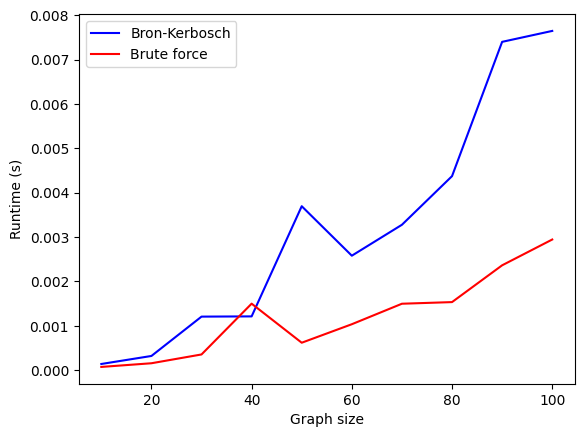

In [ ]:
#adding extra print statements to check which one gave the optimal solution

import random
import networkx as nx
import time
import matplotlib.pyplot as plt


def bron_kerbosch_brute_force(graph):
    """
    Find the largest maximal clique in a graph using brute force.
    """
    max_clique = set()
    for nodes in nx.find_cliques(graph):
        if len(nodes) > len(max_clique):
            max_clique = set(nodes)
    return max_clique


bron_kerbosch_times = []
bron_kerbosch_brute_force_times = []

# Compare the runtimes of the two algorithms for different graph sizes
graph_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for n in graph_sizes:
    graph = generate_random_graph(n, 0.1)
    
    # Bron-Kerbosch algorithm
    start_time = time.time()
    bron_kerbosch_result = bron_kerbosch(graph)
    end_time = time.time()
    bron_kerbosch_time = end_time - start_time
    bron_kerbosch_times.append(bron_kerbosch_time)
    
    # Brute force algorithm
    start_time = time.time()
    brute_force_result = bron_kerbosch_brute_force(graph)
    end_time = time.time()
    brute_force_time = end_time - start_time
    bron_kerbosch_brute_force_times.append(brute_force_time)    
    
    # Print results and runtimes
    print(f"Graph size: {n}")
    print(f"Bron-Kerbosch result: {bron_kerbosch_result}, Time: {bron_kerbosch_time:.4f}s")
    print(f"Brute force result  : {brute_force_result}, Time: {brute_force_time:.4f}s")
    print("--------------------")
    

# Plot
plt.plot(graph_sizes, bron_kerbosch_times, label='Bron-Kerbosch', color='blue')
plt.plot(graph_sizes, bron_kerbosch_brute_force_times, label='Brute force', color='red')
plt.xlabel('Graph size')
plt.ylabel('Runtime (s)')
plt.legend()
plt.show()


Statistical Analysis such as variance, mean, standard deviation and standard error to analyise the running time of the brute force algorithm for Bron Kerbosch 

In [ ]:
import random
import networkx as nx
import time
import statistics
from scipy.stats import t


def generate_random_graph(n, p):
    """
    Generate a random graph with n nodes and edge probability p.
    """
    graph = nx.fast_gnp_random_graph(n, p)
    return graph


def bron_kerbosch_brute_force(graph):
    """
    Find the largest maximal clique in a graph using brute force.
    """
    max_clique = set()
    for nodes in nx.find_cliques(graph):
        if len(nodes) > len(max_clique):
            max_clique = set(nodes)
    return max_clique


def calculate_statistics(times, confidence_level):
    """
    Calculate the statistics (mean, variance, standard deviation, standard error) for a list of execution times.
    """
    mean = statistics.mean(times)
    variance = statistics.variance(times)
    std_dev = statistics.stdev(times)
    std_error = std_dev / (len(times) ** 0.5)

    # Calculate confidence interval
    dof = len(times) - 1
    margin_error = std_error * t.ppf((1 + confidence_level) / 2, dof)
    confidence_interval = (mean - margin_error, mean + margin_error)

    return mean, variance, std_dev, std_error, confidence_interval


graph_sizes = [10, 20, 30, 80, 100]
confidence_level = 0.90

for n in graph_sizes:
    bron_kerbosch_times = []

    for _ in range(5):  # Run the algorithm 5 times for each graph size
        graph = generate_random_graph(n, 0.5)

        # Bron-Kerbosch brute force algorithm
        start_time = time.time()
        bron_kerbosch_result = bron_kerbosch_brute_force(graph)
        end_time = time.time()
        execution_time = end_time - start_time
        bron_kerbosch_times.append(execution_time)

        # Print results and execution time
        print(f"Graph Size: {n}")
        print(f"Bron-Kerbosch Brute Force result: {bron_kerbosch_result}")
        print(f"Execution Time: {execution_time:.6f}s")
        print("--------------------")

    # Calculate statistics for execution times
    mean_time, variance_time, std_dev_time, std_error_time, confidence_interval = calculate_statistics(bron_kerbosch_times, confidence_level)

    # Print statistics for the current graph size
    print(f"Statistics for Graph Size {n}:")
    print(f"Mean Time: {mean_time:.6f}s")
    print(f"Variance: {variance_time:.6f}")
    print(f"Standard Deviation: {std_dev_time:.6f}")
    print(f"Standard Error: {std_error_time:.6f}")
    print(f"Confidence Interval ({confidence_level*100}%): {confidence_interval}")
    print("====================")


Graph Size: 10
Bron-Kerbosch Brute Force result: {9, 2, 4, 7}
Execution Time: 0.000352s
--------------------
Graph Size: 10
Bron-Kerbosch Brute Force result: {0, 1, 4, 6}
Execution Time: 0.000182s
--------------------
Graph Size: 10
Bron-Kerbosch Brute Force result: {0, 8, 2, 6}
Execution Time: 0.000164s
--------------------
Graph Size: 10
Bron-Kerbosch Brute Force result: {0, 2, 4, 5}
Execution Time: 0.000129s
--------------------
Graph Size: 10
Bron-Kerbosch Brute Force result: {0, 8, 2, 7}
Execution Time: 0.000151s
--------------------
Statistics for Graph Size 10:
Mean Time: 0.000195s
Variance: 0.000000
Standard Deviation: 0.000089
Standard Error: 0.000040
Confidence Interval (90.0%): (0.00011014102146443544, 0.0002806747133988458)
Graph Size: 20
Bron-Kerbosch Brute Force result: {0, 3, 6, 8, 13}
Execution Time: 0.000598s
--------------------
Graph Size: 20
Bron-Kerbosch Brute Force result: {0, 5, 9, 12, 17}
Execution Time: 0.000339s
--------------------
Graph Size: 20
Bron-Kerbosc

Statistical Analysis such as variance, mean, standard deviation and standard error to analyise the running time of the Heuristic Algoritm for Bron Kerbosch 

In [ ]:
import random
import networkx as nx
import time
import statistics
from scipy.stats import t


def bron_kerbosch(graph):
    def visit(p, x):
        # Non-local variables
        nonlocal max_clique, maximal_cliques, graph

        # If both p and x are empty, we have found a maximal clique
        if not p and not x:
            if len(max_clique) < len(r):
                max_clique = r.copy()
            maximal_cliques.append(r.copy())

        # Choose a pivot vertex u from the union of p and x
        pivot = max(p.union(x), key=lambda v: len(graph[v])) if p.union(x) else None

        # For each vertex v in p \ N(u), where N(u) is the neighbors of u
        for v in p - set(graph[pivot]) if pivot is not None else p:
            # Add v to r
            r.add(v)
            # Recurse on the set of vertices in p that are neighbors of v
            visit(p.intersection(set(graph[v])), x.intersection(set(graph[v])))
            # Remove v from r
            r.remove(v)
            # Move v from p to x
            p.remove(v)
            x.add(v)

    # Initialize variables
    max_clique = set()
    maximal_cliques = []
    r = set()
    p = set(graph.nodes())
    x = set()

    # Start the recursion
    visit(p, x)

    # Return the largest maximal clique
    return max_clique



def generate_random_graph(n, p):
    """
    Generate a random graph with n nodes and edge probability p.
    """
    graph = nx.fast_gnp_random_graph(n, p)
    return graph


def calculate_statistics(times, confidence_level):
    """
    Calculate the statistics (mean, variance, standard deviation, standard error) for a list of execution times.
    """
    mean = statistics.mean(times)
    variance = statistics.variance(times)
    std_dev = statistics.stdev(times)
    std_error = std_dev / (len(times) ** 0.5)

    # Calculate confidence interval
    dof = len(times) - 1
    margin_error = std_error * t.ppf((1 + confidence_level) / 2, dof)
    confidence_interval = (mean - margin_error, mean + margin_error)

    return mean, variance, std_dev, std_error, confidence_interval


graph_sizes = [10, 20, 30, 80, 100]
confidence_level = 0.90

for n in graph_sizes:
    bron_kerbosch_times = []

    for _ in range(5):  # Run the algorithm 5 times for each graph size
        graph = generate_random_graph(n, 0.5)

        # Bron-Kerbosch heuristic algorithm
        start_time = time.time()
        bron_kerbosch_result = bron_kerbosch(graph)
        end_time = time.time()
        execution_time = end_time - start_time
        bron_kerbosch_times.append(execution_time)

        # Print results and execution time
        print(f"Graph Size: {n}")
        print(f"Bron-Kerbosch Heuristic result: {bron_kerbosch_result}")
        print(f"Execution Time: {execution_time:.6f}s")
        print("--------------------")

    # Calculate statistics for execution times
    mean_time, variance_time, std_dev_time, std_error_time, confidence_interval = calculate_statistics(bron_kerbosch_times, confidence_level)

    # Print statistics for the current graph size
    print(f"Statistics for Graph Size {n}:")
    print(f"Mean Time: {mean_time:.6f}s")
    print(f"Variance: {variance_time:.6f}")
    print(f"Standard Deviation: {std_dev_time:.6f}")
    print(f"Standard Error: {std_error_time:.6f}")
    print(f"Confidence Interval ({confidence_level*100}%): {confidence_interval}")
    print("====================")


Graph Size: 10
Bron-Kerbosch Heuristic result: {0, 1, 4, 6, 8}
Execution Time: 0.000234s
--------------------
Graph Size: 10
Bron-Kerbosch Heuristic result: {8, 1, 5, 9}
Execution Time: 0.000266s
--------------------
Graph Size: 10
Bron-Kerbosch Heuristic result: {8, 1, 5, 7}
Execution Time: 0.000330s
--------------------
Graph Size: 10
Bron-Kerbosch Heuristic result: {1, 3, 4, 9}
Execution Time: 0.000196s
--------------------
Graph Size: 10
Bron-Kerbosch Heuristic result: {0, 8, 2, 7}
Execution Time: 0.000241s
--------------------
Statistics for Graph Size 10:
Mean Time: 0.000253s
Variance: 0.000000
Standard Deviation: 0.000050
Standard Error: 0.000022
Confidence Interval (90.0%): (0.00020590419561859942, 0.00030078296868804117)
Graph Size: 20
Bron-Kerbosch Heuristic result: {0, 16, 17, 7, 10, 14}
Execution Time: 0.001436s
--------------------
Graph Size: 20
Bron-Kerbosch Heuristic result: {0, 16, 3, 8, 9, 13}
Execution Time: 0.001145s
--------------------
Graph Size: 20
Bron-Kerbosch

FUNCTIONAL TESTING
* To test the correctnes of the algorithms, we will use pre-defined graphs rather than raandom graphs and check if our algorithms yield the correct solution

In [ ]:
import networkx as nx

# Define the graphs
graph1 = nx.Graph()
graph1.add_nodes_from([1, 2, 3, 4, 5])
graph1.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 5), (3, 4)])
#     2 -- 5
#    / \ 
#   /   \ 
#  1 --- 3 -- 4

graph2 = nx.Graph()
graph2.add_nodes_from([1, 2, 3, 4, 5])
graph2.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])
#  1 --- 2
#  |   / |
#  |  /  |
#  3 --- 4 --- 5

graph3 = nx.Graph()
graph3.add_nodes_from([1, 2, 3, 4])
graph3.add_edges_from([(1, 2), (1, 3),(1,4),(2, 3), (2,4), (3, 4)])
#  1 --- 2
#  | \ / |
#  | / \ |
#  3 --- 4


graph4 = nx.Graph()
graph4.add_nodes_from([1, 2, 3, 4, 5])
graph4.add_edges_from([(1, 5),(3,5),(2, 3), (2,4), (3, 4)])
#  1 --- 5
#        |
#        |
#  2 --- 3 
#    \   |
#      \ |
#        4

graph5 = nx.Graph()
graph5.add_nodes_from([1, 2, 3, 4])
graph5.add_edges_from([(1, 2),(3,4),(2, 3), (2,4)])
#     2 --- 4
#    / \   /
#   /   \ /
#  1 --- 3 

graph6 = nx.Graph()
graph6.add_nodes_from([1, 2, 3, 4, 5])
graph6.add_edges_from([(1, 3),(1,4),(2, 3), (5,4), (5,3), (2,4)])
#     2 --- 4 --- 5
#    / ____/______|
#   / /   /
#  3 --- 1

# Test the algorithms on the graphs
clique1 = bron_kerbosch(graph1)
clique1_brute = bron_kerbosch_brute_force(graph1)

clique2 = bron_kerbosch(graph2)
clique2_brute = bron_kerbosch_brute_force(graph2)

clique3 = bron_kerbosch(graph3)
clique3_brute = bron_kerbosch_brute_force(graph3)

clique4 = bron_kerbosch(graph4)
clique4_brute = bron_kerbosch_brute_force(graph4)

clique5 = bron_kerbosch(graph5)
clique5_brute = bron_kerbosch_brute_force(graph5)

clique6 = bron_kerbosch(graph6)
clique6_brute = bron_kerbosch_brute_force(graph6)

# Print the results
print("Graph 1:")
print(f"Bron-Kerbosch Heuristic result: {clique1}")
print(f"Bron-Kerbosch brute force result: {clique1_brute}")
print("--------------------")

print("Graph 2:")
print(f"Bron-Kerbosch Heuristic result: {clique2}")
print(f"Bron-Kerbosch brute force result: {clique2_brute}")
print("--------------------")

print("Graph 3:")
print(f"Bron-Kerbosch Heuristic result: {clique3}")
print(f"Bron-Kerbosch Brute Force result: {clique3_brute}")
print("--------------------")

print("Graph 4:")
print(f"Bron-Kerbosch Heuristic result: {clique4}")
print(f"Bron-Kerbosch Brute Force result: {clique4_brute}")
print("--------------------")

print("Graph 5:")
print(f"Bron-Kerbosch Heuristic result: {clique5}")
print(f"Bron-Kerbosch Brute Force result: {clique5_brute}")
print("--------------------")

print("Graph 6:")
print(f"Bron-Kerbosch Heuristic result: {clique6}")
print(f"Bron-Kerbosch Brute Force result: {clique6_brute}")
print("--------------------")

Graph 1:
Bron-Kerbosch Heuristic result: {1, 2, 3}
Bron-Kerbosch brute force result: {1, 2, 3}
--------------------
Graph 2:
Bron-Kerbosch Heuristic result: {1, 2, 3}
Bron-Kerbosch brute force result: {1, 2, 3}
--------------------
Graph 3:
Bron-Kerbosch Heuristic result: {1, 2, 3, 4}
Bron-Kerbosch Brute Force result: {1, 2, 3, 4}
--------------------
Graph 4:
Bron-Kerbosch Heuristic result: {2, 3, 4}
Bron-Kerbosch Brute Force result: {2, 3, 4}
--------------------
Graph 5:
Bron-Kerbosch Heuristic result: {2, 3, 4}
Bron-Kerbosch Brute Force result: {2, 3, 4}
--------------------
Graph 6:
Bron-Kerbosch Heuristic result: {1, 3}
Bron-Kerbosch Brute Force result: {1, 3}
--------------------
